<a href="https://colab.research.google.com/github/SaketKaswa20/Nifty50_Stock_Price_Prediction/blob/main/Nifty50StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ASIANPAINT.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN


In [3]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,ASIANPAINT,EQ,2517.95,2530.0,2575.00,2530.00,2558.0,2557.90,2557.47,1103980,2.823400e+14,58557.0,335232.0,0.3037
5302,2021-04-27,ASIANPAINT,EQ,2557.90,2545.0,2579.90,2534.00,2571.0,2574.35,2560.55,866331,2.218288e+14,66988.0,281178.0,0.3246
5303,2021-04-28,ASIANPAINT,EQ,2574.35,2588.0,2620.25,2575.00,2612.0,2614.55,2605.91,1065561,2.776752e+14,52622.0,449241.0,0.4216
5304,2021-04-29,ASIANPAINT,EQ,2614.55,2630.0,2642.00,2570.00,2613.0,2613.45,2607.33,1295346,3.377394e+14,64039.0,447979.0,0.3458
5305,2021-04-30,ASIANPAINT,EQ,2613.45,2595.0,2605.80,2524.05,2529.0,2536.40,2558.66,1384907,3.543512e+14,91934.0,750496.0,0.5419


In [4]:
df=df.drop(['Date','Symbol','Series','Prev Close','Turnover','Trades','Deliverable Volume','%Deliverble','Last'],axis=1)
df.head()

,Open,High,Low,Close,VWAP,Volume
0,370.0,390.0,370.0,381.65,380.54,3318
1,380.0,392.0,375.0,385.55,383.50,4818
2,371.5,390.0,371.5,383.00,379.81,2628
3,384.9,384.9,374.5,377.50,379.88,3354
4,376.0,390.0,370.0,385.70,383.38,9589


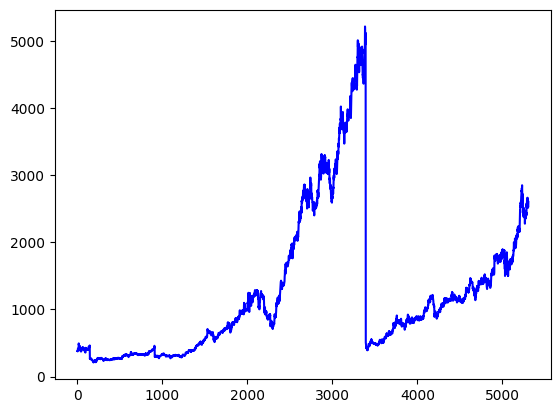

In [5]:
plt.plot(df.Close, 'b')

In [6]:
moveavg100=df.Close.rolling(100).mean() #Moving Average 100
moveavg100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5301    2519.5155
5302    2523.7060
5303    2527.6985
5304    2531.5325
5305    2533.7380
Name: Close, Length: 5306, dtype: float64

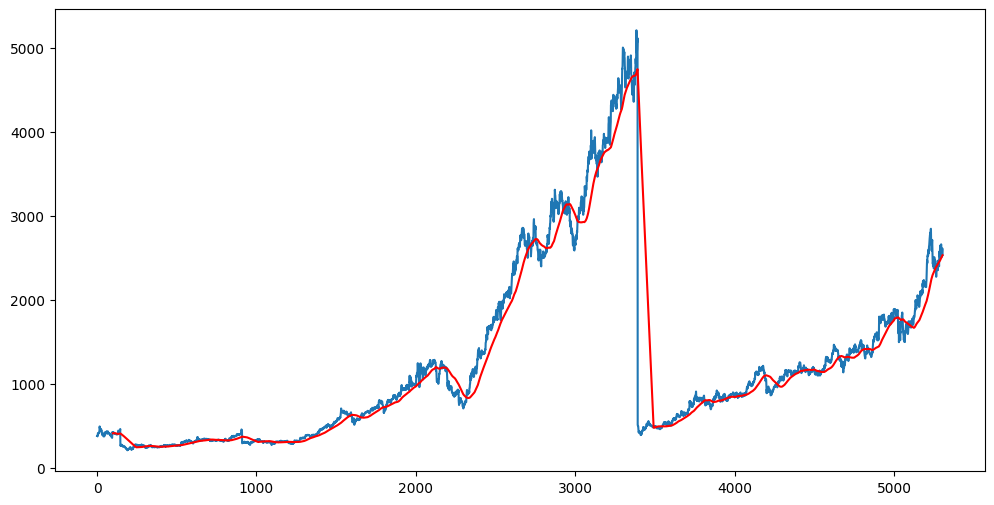

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(moveavg100, 'r') #That r specifies red colour

In [8]:
moveavg200=df.Close.rolling(200).mean() #Moving Average 200
moveavg100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5301    2519.5155
5302    2523.7060
5303    2527.6985
5304    2531.5325
5305    2533.7380
Name: Close, Length: 5306, dtype: float64

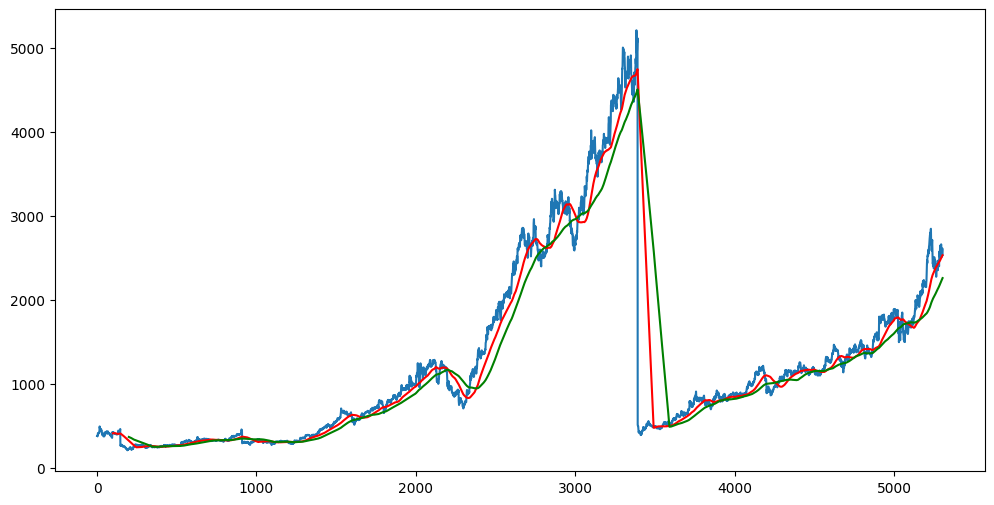

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(moveavg100, 'r') #That r specifies red colour
plt.plot(moveavg200, 'g') #That g specifies green colour

In [10]:
df.shape

(5306, 6)

In [11]:
#Splitting Data into Training and Testing

data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) #Keeping 70% Data for training that's why 0.7
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3714, 1)
(1592, 1)


In [12]:
data_testing.head()

,Close
3714,691.75
3715,704.75
3716,705.70
3717,744.70
3718,797.05


In [13]:
from sklearn.preprocessing import MinMaxScaler #To Scale data between 0 and 1
scaler= MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.03416394],
       [0.03494358],
       [0.03443382],
       ...,
       [0.09591492],
       [0.09623477],
       [0.09602487]])

In [15]:
data_training_array.shape

(3714, 1)

In [16]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train, y_train= np.array(x_train), np.array(y_train)


In [17]:
x_train.shape

(3614, 100, 1)

## ML MODEL

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model=Sequential()
model.add(LSTM(units=50, activation= 'relu', return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1)) #Only 1 unit because we are prediciting only closing price

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
113/113 [==============================] - 36s 267ms/step - loss: 0.0150
Epoch 2/50
113/113 [==============================] - 31s 271ms/step - loss: 0.0066
Epoch 3/50
113/113 [==============================] - 30s 268ms/step - loss: 0.0052
Epoch 4/50
113/113 [==============================] - 29s 258ms/step - loss: 0.0054
Epoch 5/50
113/113 [==============================] - 29s 257ms/step - loss: 0.0044
Epoch 6/50
113/113 [==============================] - 30s 269ms/step - loss: 0.0040
Epoch 7/50
113/113 [==============================] - 29s 257ms/step - loss: 0.0036
Epoch 8/50
113/113 [==============================] - 29s 258ms/step - loss: 0.0034
Epoch 9/50
113/113 [==============================] - 30s 269ms/step - loss: 0.0034
Epoch 10/50
113/113 [==============================] - 29s 257ms/step - loss: 0.0027
Epoch 11/50
113/113 [==============================] - 29s 258ms/step - loss: 0.0028
Epoch 12/50
113/113 [==============================] - 32s 280ms/step - lo

In [22]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
past_100_days=data_training.tail(100)

In [24]:
final_df= past_100_days.append(data_testing, ignore_index=True)

<ipython-input-24-cdf4f417b3b1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df= past_100_days.append(data_testing, ignore_index=True)


In [25]:
input_data=scaler.fit_transform(final_df)

In [26]:
input_data.shape

(1692, 1)

In [27]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [28]:
x_test, y_test= np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1592, 100, 1)
(1592,)


## Making Predictions

In [29]:
y_predicted= model.predict(x_test)

50/50 [==============================] - 4s 79ms/step


In [30]:
y_predicted

array([[0.07386683],
       [0.07503624],
       [0.07627486],
       ...,
       [0.8771369 ],
       [0.876523  ],
       [0.87659264]], dtype=float32)

In [31]:
scaler= scaler.scale_
scaler

array([0.00043851])

In [32]:
scale_factor=1/scaler[0]
y_predicted= y_predicted * scale_factor
y_test= y_test * scale_factor

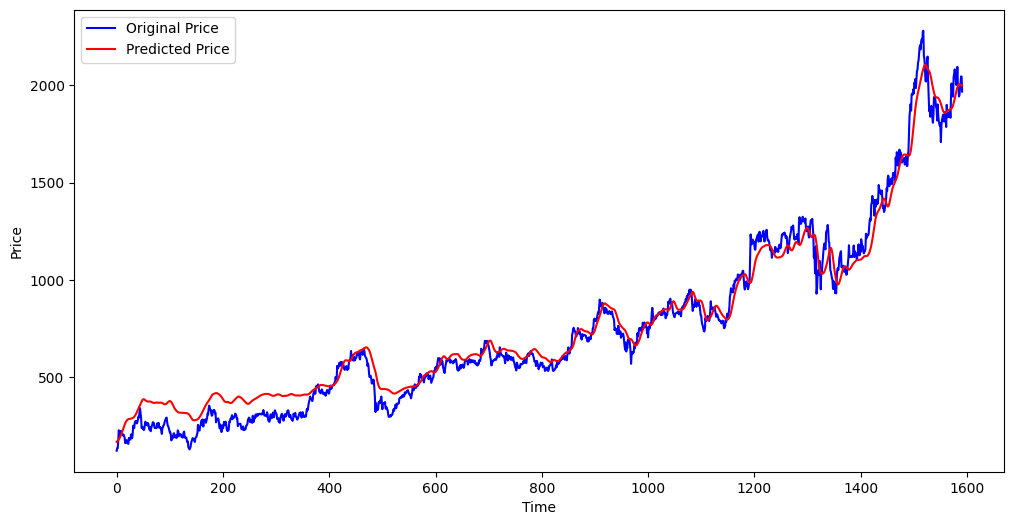

In [33]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()